## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

### Prepare Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [166]:
titanic = pd.read_csv("titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Create Hypotheses

1. Determine if the survival rate is associated to the class of passenger
    - H0: The class of passenger does not affect the survival rate.
    - H1: The class of passenger affects the survival rate.

2. Determine if the survival rate is associated to the gender
    - H0:The gender of passenger does not affect the survival rate.
    - H1: The gender of passenger affects the survival rate.

3. Determine the survival rate is associated to the age
    - H0: The age class does not affect the survival rate.
    - H1: The age class affects the survival rate.


### Analysis Hypotheses 1
Determine if the survival rate is associated to the class of passenger

**1. Create a table for survival rate and Pclass**

In [85]:
table_survival_pclass = pd.crosstab(titanic['Pclass'], titanic['Survived'])
table_survival_pclass.columns = ['Not Survived', 'Survived']
table_survival_pclass.index = ['1st', '2nd','3rd']
table_survival_pclass

,Not Survived,Survived
1st,80,136
2nd,97,87
3rd,372,119


**2. Draw a plot**

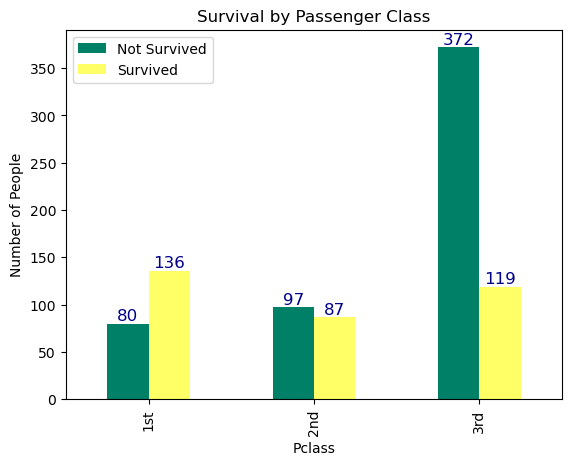

In [120]:
# Create an unstacked bar plot

plot1=table_survival_pclass.plot(kind='bar', stacked=False, colormap='summer')

plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.title('Survival by Passenger Class')
plt.legend(labels=['Not Survived', 'Survived'])

for i in plot1.containers:
    plot1.bar_label(i, label_type='edge', fontsize=12, color='darkblue')

# The plot
plt.show()

Based on the bar chart, it appears that there is no statistically significant association between survival chance and passenger class.

**3. Chi-Squared Test**

In [137]:
import pandas as pd
from scipy.stats import chi2_contingency
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(table_survival_pclass)

# print the result
print("Hyp1_Chi2: ", "{:.2f}".format(chi2_1))
print("Hyp1_P-Value: "  "{:.5f}".format(p_1))
print("Hyp1_Degree of freedom: ", dof_1)

Hyp1_Chi2:  102.89
Hyp1_P-Value: 0.00000
Hyp1_Degree of freedom:  2


**4.Interpret the result**  

Since we are using a significance level of 0.05 (5%), our result shows that the p-value (0.0000) is less than the chosen significance level (p-value < 0.05). Therefore, we reject the null hypothesis. In other words, the passenger class does affect the survival rate.

### Analysis Hypotheses 2  
Determine if the survival rate is associated to the gender

**1. Create a table for survival rate and Pclass**

In [119]:
table_survival_gender = pd.crosstab(titanic['Sex'], titanic['Survived'])
table_survival_gender.columns = ['Not Survived', 'Survived']
table_survival_gender

,Not Survived,Survived
Sex,,
female,81,233
male,468,109


**2. Draw a plot**

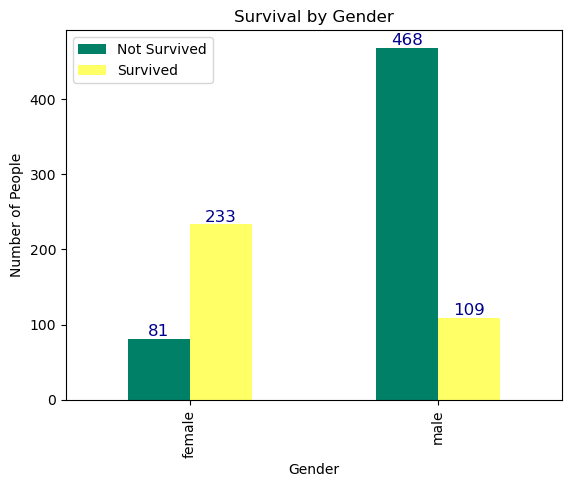

In [122]:
# Create an unstacked bar plot

plot2=table_survival_gender.plot(kind='bar', stacked=False, colormap='summer')

plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Survival by Gender')
plt.legend(labels=['Not Survived', 'Survived'])

for i in plot2.containers:
    plot2.bar_label(i, label_type='edge', fontsize=12, color='darkblue')

# The plot
plt.show()

Based on the bar chart, it appears that there is no statistically significant association between survival chance and gender.

**3. Chi-Squared Test**

In [138]:
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(table_survival_gender)

# print the result
print("Hyp2_Chi2: ", "{:.2f}".format(chi2_2))
print("Hyp2_P-Value: "  "{:.5f}".format(p_2))
print("Hyp2_Degree of freedom: ", dof_2)

Hyp2_Chi2:  260.72
Hyp2_P-Value2: 0.00000
Hyp2_Degree of freedom:  1


**4.Interpret the result**  

Since we are using a significance level of 0.05 (5%), our result shows that the p-value (0.0000) is less than the chosen significance level (p-value < 0.05). Therefore, we reject the null hypothesis. In other words, the passenger gender does affect the survival rate.

### Analysis Hypotheses 3  
Determine the survival rate is associated to the age

#### 1.Prepare dataset
To convert missing values in the "Age" column into the mean age
Create a new column to classify as "children" or "adult" based on their age

In [146]:
#Describe the mean age
mean_age = titanic['Age'].mean()
print('The mean age is',"{:.1f}".format(mean_age))

The mean age is 29.7


In [150]:
#To convert missing values in the "Age" column into the mean age
titanic['Age'].fillna(mean_age, inplace=True)

#To check if there is any missing values in dataset
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Age_Category      0
dtype: int64

In [153]:
#Create a new column to classify as "children" or "adult" based on their age
titanic['Age_Category'] = titanic['Age'].apply(lambda age: 'Children' if age <= 15 else 'Adult')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


**2. Create a table for survival rate and Pclass**

In [162]:
table_survival_age = pd.crosstab(titanic['Age_Category'], titanic['Survived'])
table_survival_age.columns = ['Not Survived', 'Survived']
table_survival_age

,Not Survived,Survived
Age_Category,,
Adult,515,293
Children,34,49


**3. Draw a plot**

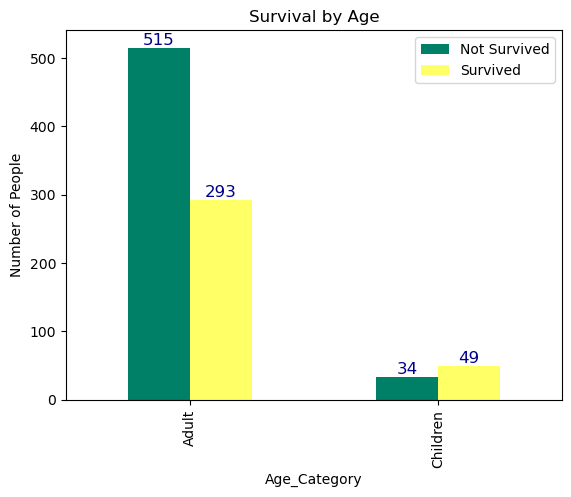

In [163]:
# Create an unstacked bar plot

plot3=table_survival_age.plot(kind='bar', stacked=False, colormap='summer')

plt.xlabel('Age_Category')
plt.ylabel('Number of People')
plt.title('Survival by Age')
plt.legend(labels=['Not Survived', 'Survived'])

for i in plot3.containers:
    plot3.bar_label(i, label_type='edge', fontsize=12, color='darkblue')

# The plot
plt.show()

Based on the bar chart, it appears that there is no statistically significant association between survival chance and age range.

**4. Chi-Squared Test**

In [164]:
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(table_survival_age)

# print the result
print("Hyp3_Chi2: ", "{:.2f}".format(chi2_3))
print("Hyp3_P-Value: "  "{:.5f}".format(p_3))
print("Hyp3_Degree of freedom: ", dof_3)

Hyp3_Chi2:  15.56
Hyp3_P-Value: 0.00008
Hyp3_Degree of freedom:  1


**5.Interpret the result**  

Since we are using a significance level of 0.05 (5%), our result shows that the p-value (0.00008) is less than the chosen significance level (p-value < 0.05). Therefore, we reject the null hypothesis. In other words, the passenger age does affect the survival rate.